In [3]:
import pandas as pd
from supabase import create_client, Client
import os
import matplotlib.pyplot as plt

supabase_url = os.getenv('SUPABASE_URL')
supabase_key = os.getenv('SUPABASE_KEY') 

url: str = supabase_url
key: str = supabase_key

supabase: Client = create_client(url, key)

response = supabase.table('produtosKabum').select('*').execute()

df = pd.DataFrame(response.data)

df.head()

,id,data,id_kabum,categoria,subcategoria,nome,preco,preco_pix,descricao,openbox,imagem,site,url
0,264,2024-06-19T19:41:29.3192+00:00,128250,Hardware,Disco Rígido (HD),"HD Seagate IronWolf NAS, 14TB, 3.5´, SATA - ST...",3294.11,2799.99,Compre HD Seagate IronWolf NAS no KaBuM! As me...,0,,kabum,https://www.kabum.com.br/produto/128250
1,265,2024-06-19T19:41:29.432631+00:00,100916,Hardware,Disco Rígido (HD),"HD Seagate 2TB BarraCuda, 3.5', SATA - ST2000D...",494.11,419.99,"Um desempenho robusto e confiabilidade, Cache ...",0,https://images.kabum.com.br/produtos/fotos/100...,kabum,https://www.kabum.com.br/produto/100916
2,266,2024-06-19T19:41:29.517339+00:00,95803,Hardware,Disco Rígido (HD),"HD Seagate 4TB BarraCuda, 3.5', SATA - ST4000D...",823.52,699.99,O HD perfeito para armazenamento de todos os s...,0,https://images.kabum.com.br/produtos/fotos/958...,kabum,https://www.kabum.com.br/produto/95803
3,267,2024-06-19T19:41:29.592922+00:00,472212,Hardware,Disco Rígido (HD),"HD Western Digital Purple, 2TB, 64mb, Sata 3 -...",505.87,429.99,Conte com a confiabilidade e desempenho em dis...,0,,kabum,https://www.kabum.com.br/produto/472212
4,268,2024-06-19T19:41:29.660958+00:00,460466,Hardware,Disco Rígido (HD),"HD WD Red Plus, 4TB, 5400 RPM, 3.5', SATA - WD...",835.28,709.99,Com desempenho confiável e um tempo de ativida...,0,,kabum,https://www.kabum.com.br/produto/460466


In [4]:
# tipos de categorias
categorias = df['categoria'].unique()
print(categorias)

# tipos de subcategorias
subcategorias = df['subcategoria'].unique()
print(subcategorias)

['Hardware' 'Computadores']
['Disco Rígido (HD)' 'Memória RAM' 'Placa de vídeo (VGA)' 'Placas-mãe'
 'SSD' 'Coolers' 'Processadores' 'Fontes' 'Notebooks']


In [5]:
# criação do dataframe de HDs
HD_df = df[df['subcategoria'] == 'Placas-mãe']
len(HD_df)

8003

In [6]:
# Criação dataframe para o produto selecionado
produto_selecionado = HD_df[HD_df['id_kabum'] == 108499]
len(produto_selecionado)

72

In [7]:
# Remoção dos registros realizados no mesmo dia e ordenação do dataframe por data
# Converter a coluna 'data' para datetime
produto_selecionado['data'] = pd.to_datetime(produto_selecionado['data'])

# Extrair a data sem a parte do tempo
produto_selecionado['data_somente'] = produto_selecionado['data'].dt.date

# Remover duplicatas com base na coluna 'data_somente'
df_sem_duplicatas = produto_selecionado.drop_duplicates(subset='data_somente')

# Ordenar o DataFrame pela coluna 'data' em ordem crescente
df_ordenado = df_sem_duplicatas.sort_values(by='data_somente', ascending=True)

df_ordenado.head()


C:\Users\Josue\AppData\Local\Temp\ipykernel_18692\3950794577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_selecionado['data'] = pd.to_datetime(produto_selecionado['data'])
C:\Users\Josue\AppData\Local\Temp\ipykernel_18692\3950794577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_selecionado['data_somente'] = produto_selecionado['data'].dt.date


,id,data,id_kabum,categoria,subcategoria,nome,preco,preco_pix,descricao,openbox,imagem,site,url,data_somente
6762,6983,2024-08-11 18:32:58.374090+00:00,108499,Hardware,Placas-mãe,"Placa-Mãe MSI B450M Pro-VDH Max p/ AMD AM4, m-...",658.81,559.99,Compre Placa-Mãe MSI B450M Pro-VDH Max p/ AMD ...,0,https://images.kabum.com.br/produtos/fotos/108...,kabum,https://www.kabum.com.br/produto/108499,2024-08-11
7465,7685,2024-08-12 15:37:05.637892+00:00,108499,Hardware,Placas-mãe,"Placa-Mãe MSI B450M Pro-VDH Max p/ AMD AM4, m-...",658.81,559.99,Compre Placa-Mãe MSI B450M Pro-VDH Max p/ AMD ...,0,https://images.kabum.com.br/produtos/fotos/108...,kabum,https://www.kabum.com.br/produto/108499,2024-08-12
8164,8387,2024-08-13 17:42:07.952250+00:00,108499,Hardware,Placas-mãe,"Placa-Mãe MSI B450M Pro-VDH Max p/ AMD AM4, m-...",647.05,549.99,Compre Placa-Mãe MSI B450M Pro-VDH Max p/ AMD ...,0,https://images.kabum.com.br/produtos/fotos/108...,kabum,https://www.kabum.com.br/produto/108499,2024-08-13
8869,9085,2024-08-14 16:25:47.098462+00:00,108499,Hardware,Placas-mãe,"Placa-Mãe MSI B450M Pro-VDH Max p/ AMD AM4, m-...",611.10,549.99,Compre Placa-Mãe MSI B450M Pro-VDH Max p/ AMD ...,0,https://images.kabum.com.br/produtos/fotos/108...,kabum,https://www.kabum.com.br/produto/108499,2024-08-14
9581,9786,2024-08-15 15:59:31.542886+00:00,108499,Hardware,Placas-mãe,"Placa-Mãe MSI B450M Pro-VDH Max p/ AMD AM4, m-...",611.10,549.99,Compre Placa-Mãe MSI B450M Pro-VDH Max p/ AMD ...,0,https://images.kabum.com.br/produtos/fotos/108...,kabum,https://www.kabum.com.br/produto/108499,2024-08-15


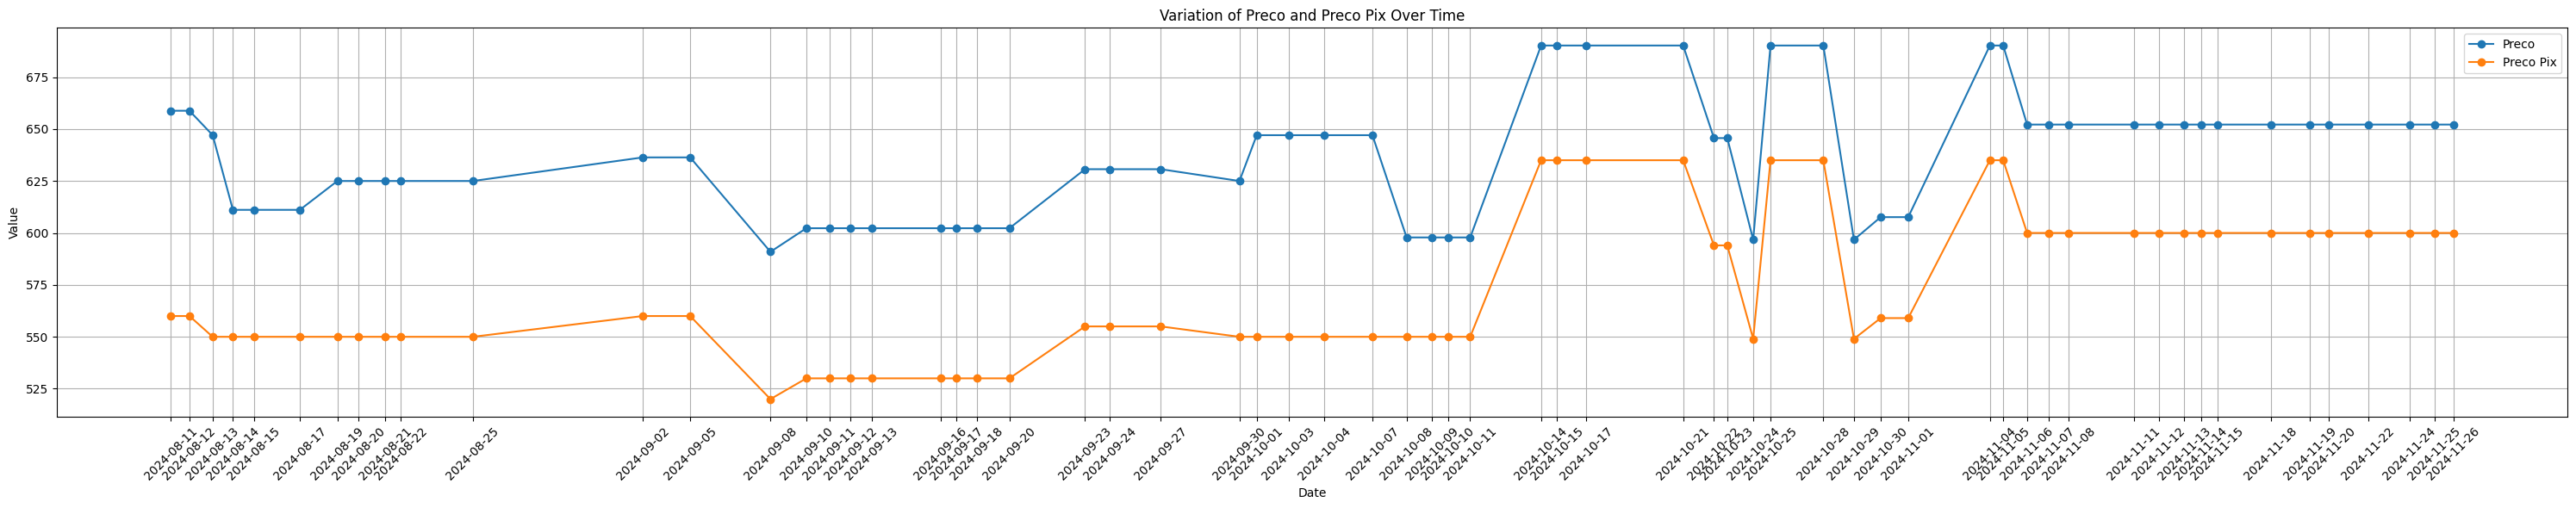

In [8]:
plt.figure(figsize=(30, 6))

# Plotting 'preco'
plt.plot(df_ordenado['data'], df_ordenado['preco'], label='Preco', marker='o')

# Plotting 'preco_pix'
plt.plot(df_ordenado['data'], df_ordenado['preco_pix'], label='Preco Pix', marker='o')

# Adding title and labels
plt.title('Variation of Preco and Preco Pix Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Adding a legend
plt.legend()

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Explicitly setting x-ticks to show all dates
plt.xticks(df_ordenado['data'], df_ordenado['data'].dt.strftime('%Y-%m-%d'), rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()